In [44]:
import py_dbar as pd
import numpy as np
from py_dbar import read_data,k_grid, dBar, sim

ModuleNotFoundError: No module named 'k_grid'

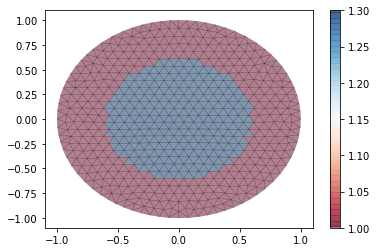

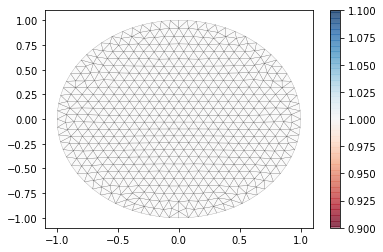

In [37]:
# Number of Electrodes
L = 16

# Defining a type of anomaly
anomaly = [{'x':0., 'y':0., 'd':.6, 'perm': 1.3}]
no_anomaly = []

Object = sim.sim(anomaly, L)
Object.simulate()

Homo = sim.sim(no_anomaly, L)
Homo.simulate()

In [25]:
Object.Voltage.shape

(15, 16)

In [32]:
for i in range(L-1):
    for j in range(L):
        print(str(Homo.Current[i, j]) + ' ', end='')
    print()

1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -1.0 


In [41]:

# Read the boundary measurements and create the Dirichlet-to-Neumann map
# Frame to determine the conductivity: 
Now = read_data.read_data(Object.Current, Object.Voltage, 1, 1, L)
# Frame of Reference - Homogeneous
Ref = read_data.read_data(Homo.Current, Homo.Voltage, 1, 1, L)

# Establish a k_grid which corresponds to a spectral parameter
Kp = k_grid.k_grid(4, 6)

# Creates the model which corresponds to the Dbar equation in the spectral parameter at each z of a z_grid.
model = dBar.dBar("partial_psi", Kp, Now, Ref, 1., 6)


In [42]:

# Solves the problem for each z in the 2D plane, hence determining the conductivity at each z
model.solve(Kp)

# Plots the solution
model.plot()

C:\Users\Ivan\anaconda3\lib\site-packages\pyamg\krylov\_gmres_householder.py:204: RuntimeWarning: invalid value encountered in true_divide
  w[:] = w / norm(w)


ValueError: array must not contain infs or NaNs

In [ ]:
pip install py-dbar --upgrade
